In [1]:
# Import library

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram


In [2]:
# Load data

path_major = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/Major/'
path_minor = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/Minor/'

filelist_major = os.listdir(path_major)
filelist_minor = os.listdir(path_minor)


In [5]:
# Parameter check (signal length)
major_len = [] 
minor_len = []

for filename in filelist_major:
    path = f"{path_major}{filename}"

    fs, signal = wavfile.read(path)
    major_len = np.append(major_len, len(signal))

for filename in filelist_minor:
    path = f"{path_minor}{filename}"

    fs, signal = wavfile.read(path)
    minor_len = np.append(minor_len, len(signal))

print(np.min(np.append(major_len, minor_len)))

94815.0


In [4]:
def save_spectrogram_plot(freq, time, mag, filename):
    # Create a figure with no axes
    plt.figure(figsize=(10,10))

    c = plt.pcolormesh(t, f[:3500], np.log(mag + 1e-6)[:3500,:], cmap = "bone")
    plt.axis('off')  # Hide the axes
    
    tmp = c.get_clim()
    c.set_clim(0, tmp[1]*0.7)
    
    # Save the figure without padding and axes
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

In [21]:
# Spectrogram

fs = 44100
sig_len = int(np.min(np.append(major_len, minor_len)))
time = np.linspace(0., sig_len/fs, sig_len)

# Major spectrogram
save_path = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map/3.5kHz/Major/'

for filename in filelist_major:

    file_major = f"{path_major}{filename}"

    _, signal = wavfile.read(file_major)

    freq, time, mag = spectrogram(signal[:sig_len], fs, nperseg=10000, nfft = 50000)

    savename = f"{save_path}{filename.replace('.wav','')}.png"
    save_spectrogram_plot(freq, time, mag, savename)

# Minor spectrogram
save_path = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map/3.5kHz/Minor/'

for filename in filelist_minor:
    file_minor = f"{path_minor}{filename}"

    _, signal = wavfile.read(file_minor)

    freq, time, mag = spectrogram(signal[:sig_len], fs, nperseg=10000, nfft = 50000)

    savename = f"{save_path}{filename.replace('.wav','')}.png"
    save_spectrogram_plot(freq, time, mag, savename)

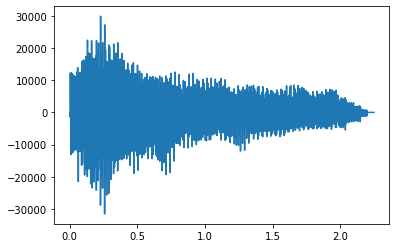

In [22]:
# Example signal

fs, signal = wavfile.read(file_major)
N = len(signal)
time = np.linspace(0., N/fs, N)

plt.plot(time,signal)
plt.show()

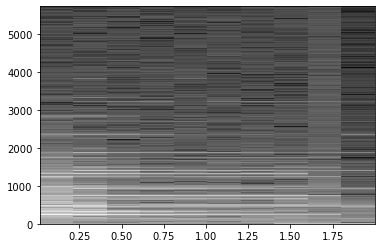

In [9]:
# Example spectrogram
fs = 44100
sig_len = int(np.min(np.append(major_len, minor_len)))
time = np.linspace(0., sig_len/fs, sig_len)

f, t, Sxx = spectrogram(signal[:sig_len], fs, nperseg=10000, nfft = 50000)

#c = plt.pcolormesh(t[:10], f[:6500], np.log(Sxx)[:6500,:10], cmap = "gray")
c = plt.pcolormesh(t[:10], f[:6500], np.log(Sxx[:6500,:10] + 1e-6), cmap = "gray")

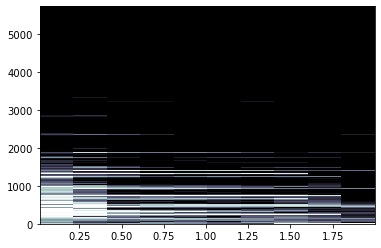

In [13]:
# Example spectrogram
fs = 44100
sig_len = int(np.min(np.append(major_len, minor_len)))
time = np.linspace(0., sig_len/fs, sig_len)

f, t, Sxx = spectrogram(signal[:sig_len], fs, nperseg = 10000, nfft = 50000)

c = plt.pcolormesh(t[:10], f[:6500], np.log(Sxx)[:6500,:10], cmap = "bone")
tmp = c.get_clim()
c.set_clim(0, tmp[1]*0.5)
plt.show()